<a href="https://colab.research.google.com/github/swastikbanerjee/AML_Lab/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/content/Program_1_Dataset.csv")

In [3]:
data.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [4]:
data.describe()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
data.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [6]:
mean_value = data['MValue'].mean()

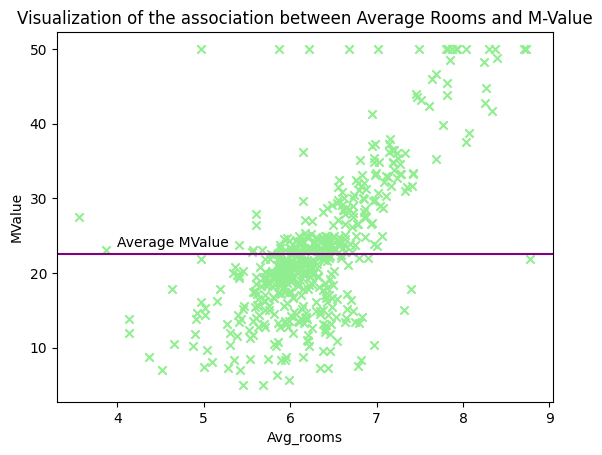

In [7]:
plt.scatter(data.iloc[:,5],data.iloc[:,-1],color='lightgreen',marker='x') #plotting actual time taken
plt.axhline(y=mean_value,color='purple') #plotting mean, if it is axvline that would be x=mean_value
plt.annotate("Average MValue", xy=(4, mean_value+1)) #adding annotations, xlabel, ylabel
plt.xlabel("Avg_rooms")
plt.ylabel("MValue")
plt.title("Visualization of the association between Average Rooms and M-Value")
plt.show()

In [8]:
x=data.iloc[:,5]
y=data.iloc[:,-1]

In [9]:
n=len(x)
split = int(0.7 * n)
x_train, x_test =x[:split], x[split:]
y_train, y_test =y[:split], y[split:]

In [10]:
xy=x_train*y_train
n=len(x_train)

xmean=x_train.mean()
ymean=y_train.mean()

numerator=xy.sum()-n*xmean*ymean
denominator=(x_train**2).sum()-n*(xmean**2)

m=numerator/denominator
c=ymean - (m*xmean)

print('intercept-c:',c,'coefficient-m:',m)

intercept-c: -33.07539575494117 coefficient-m: 9.017518302547172


In [11]:
x_train = np.array(x_train).reshape(-1,1)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

print('Intercept:',model.intercept_)
print('Coefficients',model.coef_)

Intercept: -33.07539575494124
Coefficients [9.0175183]


In [12]:
df1 = data.iloc[:354,:]

In [13]:
df1

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
350,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
351,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
352,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6


In [14]:
trained_model = c + m*data.iloc[:354,5]
df1['Pred_MValue'] = trained_model
df1[['Avg_rooms ','MValue','Pred_MValue']]

,Avg_rooms,MValue,Pred_MValue
0,7.416,33.2,33.798520
1,6.727,27.5,27.585450
2,6.781,26.5,28.072396
3,6.405,18.6,24.681809
4,6.137,19.3,22.265114
...,...,...,...
349,5.569,17.5,17.143164
350,6.027,16.8,21.273187
351,6.593,22.4,26.377102
352,6.120,20.6,22.111816


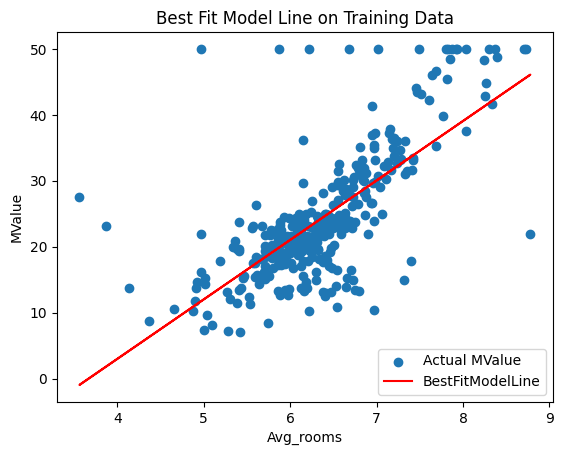

In [19]:
fig, ax = plt.subplots()
ax.scatter(x='Avg_rooms ',y='MValue',data=df1,label='Actual MValue') #plotting actual minutes
ax.plot(df1['Avg_rooms '],df1['Pred_MValue'],color='red',label='BestFitModelLine') #plotting best fit model predictions
ax.set_ylabel('MValue')
ax.set_xlabel('Avg_rooms')
ax.set_title('Best Fit Model Line on Training Data')
ax.legend()
plt.show()

In [22]:
df2 = pd.DataFrame({'Avg_rooms ':df1['Avg_rooms '],
                    'MValue':df1['MValue'],
                    'Pred_MValue':df1['Pred_MValue'],
                    'Error':(df1.Pred_MValue-df1.MValue)})
df2

,Avg_rooms,MValue,Pred_MValue,Error
0,7.416,33.2,33.798520,0.598520
1,6.727,27.5,27.585450,0.085450
2,6.781,26.5,28.072396,1.572396
3,6.405,18.6,24.681809,6.081809
4,6.137,19.3,22.265114,2.965114
...,...,...,...,...
349,5.569,17.5,17.143164,-0.356836
350,6.027,16.8,21.273187,4.473187
351,6.593,22.4,26.377102,3.977102
352,6.120,20.6,22.111816,1.511816


In [27]:
SST = sum((df2.MValue - df2.MValue.mean())**2)
SST

31940.532796610172

In [23]:
SSE = sum(df2.Error**2)
SSE

15337.569213104975

In [28]:
SSR = SST - SSE
SSR

16602.963583505196

In [29]:
Rsq = SSR/SST
Rsq

0.5198085983483425

In [32]:
RsqA = model.score(df2[['Avg_rooms ']],df2['MValue'])
RsqA

0.5198085983483426